## Zadanie domowe 6 - Maksymilian Tabian

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("World-happiness-report-2024.csv",delimiter = ",").reset_index(drop = True)

1. Country name: Name of the country.
2. Regional indicator: Region to which the country belongs.
3. Ladder score: The happiness score for each country, based on responses to the Cantril Ladder question that asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0.
4. Upper whisker: Upper bound of the happiness score.
5. Lower whisker: Lower bound of the happiness score.
6. Log GDP per capita: The natural logarithm of the country's GDP per capita, adjusted for purchasing power parity (PPP) to account for differences in the cost of living between countries.
7. Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.
8. Healthy life expectancy: The average number of years a newborn infant would live in good health, based on mortality rates and life expectancy at different ages.
9. Freedom to make life choices: The national average of responses to the question about satisfaction with freedom to choose what to do with one's life.
10. Generosity: The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.
11. Perceptions of corruption: The national average of survey responses to questions about the perceived extent of corruption in the government and businesses.
12. Dystopia + residual: Dystopia is an imaginary country with the world’s least-happy people, used as a benchmark for comparison. The dystopia + residual score is a combination of the Dystopia score and the unexplained residual for each country, ensuring that the combined score is always positive. Each of these factors contributes to the overall happiness score, but the Dystopia + residual value is a benchmark that ensures no country has a lower score than the hypothetical Dystopia.


In [3]:
df

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [4]:
df.shape

(143, 12)

In [5]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [6]:
df.dtypes

Country name                     object
Regional indicator               object
Ladder score                    float64
upperwhisker                    float64
lowerwhisker                    float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

In [7]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [8]:
df.drop(["upperwhisker", "lowerwhisker"], axis = 1).groupby("Regional indicator").mean()

,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,
Central and Eastern Europe,6.170941,1.637765,1.390706,0.610412,0.650471,0.135353,0.089353,1.656706
Commonwealth of Independent States,5.538500,1.401000,1.254556,0.543556,0.697444,0.143111,0.122333,1.404667
East Asia,5.934333,1.700333,1.302000,0.681833,0.587667,0.122167,0.200000,1.340833
Latin America and Caribbean,6.143368,1.328211,1.267316,0.571158,0.703263,0.106789,0.109211,2.057474
Middle East and North Africa,5.199941,1.460533,1.084200,0.553200,0.493667,0.108000,0.146067,1.325067
North America and ANZ,6.927750,1.860750,1.459750,0.652000,0.704500,0.226000,0.335000,1.689250
South Asia,3.895667,1.051833,0.611833,0.420333,0.553333,0.150333,0.099500,1.008500
Southeast Asia,5.551889,1.374333,1.144556,0.520222,0.765000,0.223333,0.164556,1.360111
Sub-Saharan Africa,4.329686,0.904171,0.788714,0.297686,0.515486,0.150400,0.111429,1.562086


In [9]:
df.drop(["upperwhisker", "lowerwhisker"], axis = 1).groupby("Regional indicator").std()

,Ladder score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Regional indicator,,,,,,,,
Central and Eastern Europe,0.494803,0.135296,0.156581,0.036973,0.094960,0.064969,0.094332,0.370091
Commonwealth of Independent States,0.480649,0.184776,0.208199,0.034319,0.092278,0.095422,0.074030,0.320119
East Asia,0.398773,0.221848,0.127742,0.162687,0.087612,0.073052,0.114240,0.521769
Latin America and Caribbean,0.376936,0.365315,0.113472,0.065619,0.076944,0.033641,0.071370,0.372417
Middle East and North Africa,1.260354,0.335232,0.278031,0.098459,0.224413,0.067044,0.077664,0.686013
North America and ANZ,0.151476,0.055301,0.055120,0.074256,0.079722,0.002944,0.128859,0.147834
South Asia,1.177069,0.245361,0.441024,0.125082,0.287022,0.039267,0.046427,0.718496
Southeast Asia,0.779519,0.349632,0.170951,0.113938,0.124726,0.115611,0.162781,0.471074
Sub-Saharan Africa,0.704075,0.273250,0.259498,0.086919,0.121244,0.065307,0.058567,0.611112


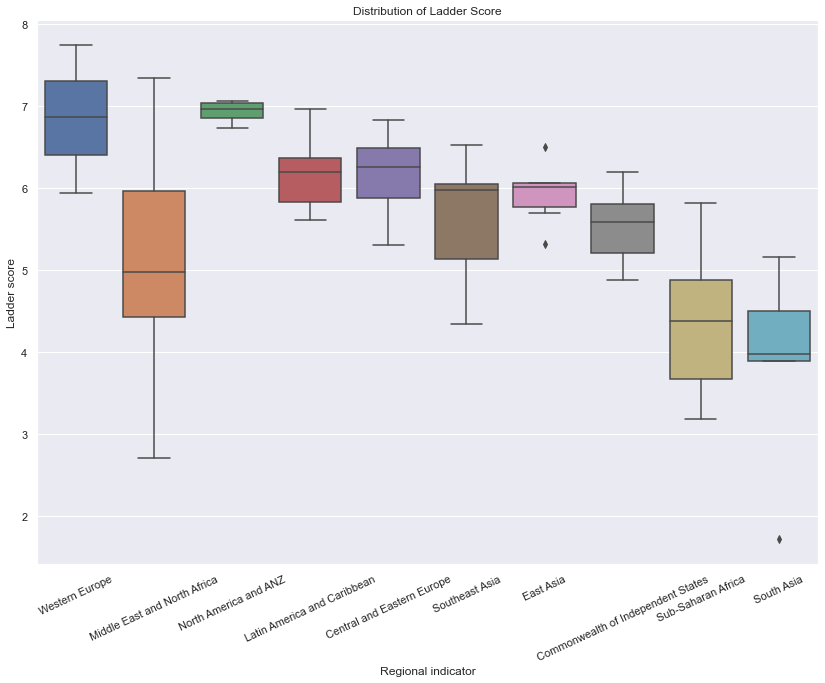

In [10]:
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.boxplot(data = df, x = 'Regional indicator', y = 'Ladder score')
plt.xticks(rotation=25)
plt.title('Distribution of Ladder Score')
plt.show()

Ladder score osiąga średnią największą wartość w Ameryce Północnej i Europie Zachodniej. W Europie zachodniej jest jednak więcej państwa, dla których wartość Ladder score jest powyżej średniej.\
Ladder score osiąga najniższą wartość w Azji Południowej i Afryce.

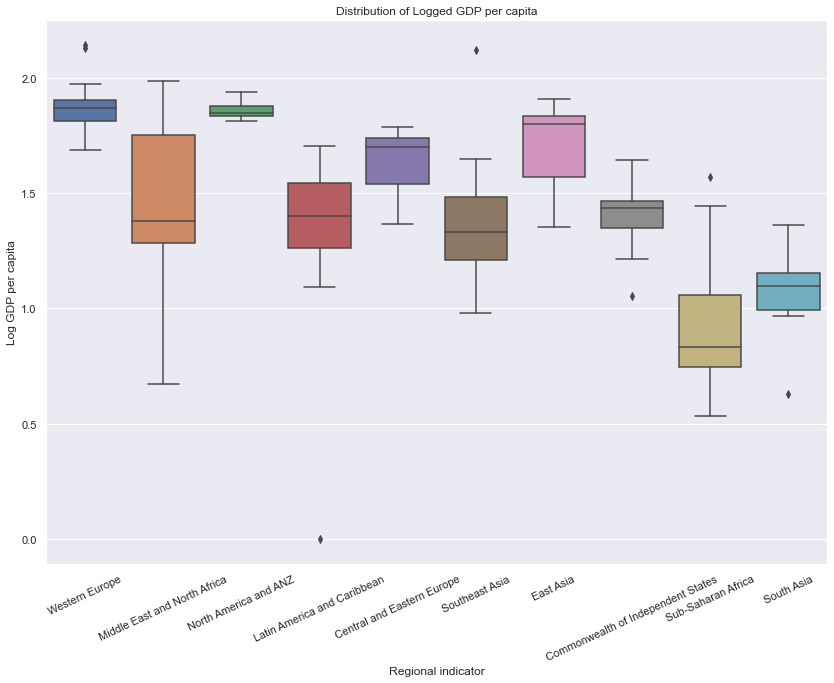

In [11]:
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.boxplot(data = df, x = 'Regional indicator', y = 'Log GDP per capita')
plt.xticks(rotation=25)
plt.title('Distribution of Logged GDP per capita')
plt.show()

Najwyższa średnia wartość GDP per capita występuje w Europie Zachodniej, Ameryce Północnej i Azji Wschodniej.\
Najniższa z kolei w Afryce i Azji Południowej.

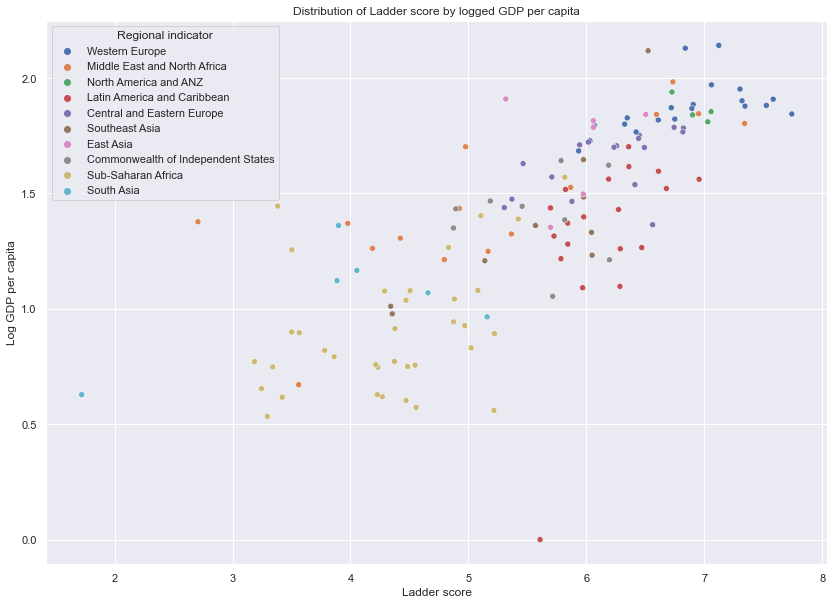

In [12]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Ladder score', y='Log GDP per capita', hue='Regional indicator')
plt.title('Distribution of Ladder score by logged GDP per capita')
plt.show()

Im większa wartość GDP per capita, tym większa wartość Ladder score. Zatem mieszkańcy państw zamożnych są bardziej
szczęśliwi od mieszkańców państw biedniejszych, czego można było się zresztą spodziewać.

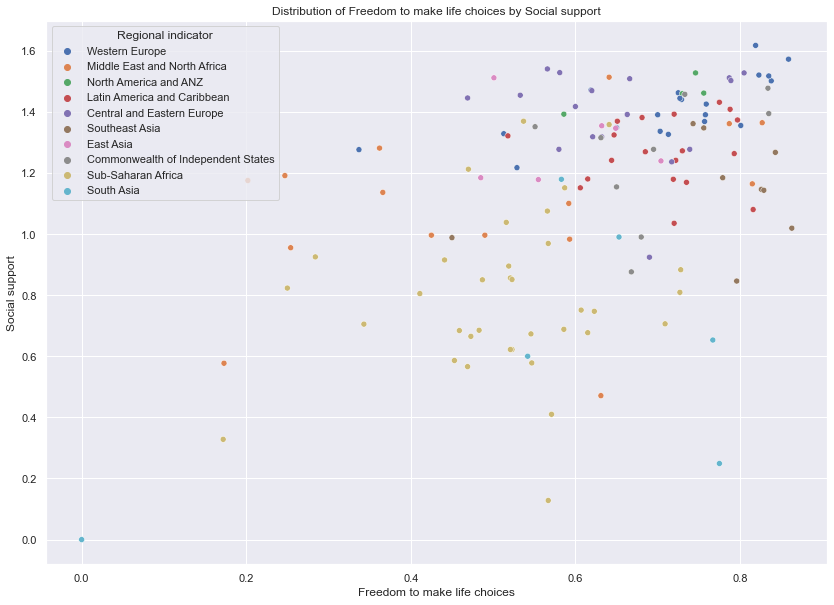

In [13]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x= 'Freedom to make life choices', y= 'Social support', hue='Regional indicator')
plt.title('Distribution of Freedom to make life choices by Social support')
plt.show()

Średnio im większa wartość Soccial support, tym większa wartość Freedom to make life choices, co również nie jest zaskakującym 
rezultatem